# Machine Learning Pipeline and Results

In [1]:
import pandas as pd

from src.ml_model import ModelPipeline

In [2]:
# Import dataframe 

df = pd.read_excel("Data/CustomerChurn_Transformed.xlsx")
df.drop(columns="Unnamed: 0", inplace=True)
df.shape

(7032, 19)

In [3]:
df.head(5)

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [4]:
# Initialize class for machine learning and data viz operations

evaluation_pipeline = ModelPipeline(df, 'Churn')

In [5]:
# Models to performe

evaluation_pipeline.models

{'RandomForest': RandomForestClassifier(random_state=59),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'LogisticRegression': LogisticRegression(max_iter=1000)}

## Modelling without handling imbalanced lale

In [6]:
# Performing stratified cross-validation

print("Evaluating without handling imbalanced labels:")
evaluation_pipeline.stratified_k_cv(k=10, imbalance_method=None)

Evaluating without handling imbalanced labels:
Fold 1:
Training Model 1 RandomForest...
Training Model 2 XGBoost...
Training Model 3 LogisticRegression...
Fold 2:
Training Model 1 RandomForest...
Training Model 2 XGBoost...
Training Model 3 LogisticRegression...
Fold 3:
Training Model 1 RandomForest...
Training Model 2 XGBoost...
Training Model 3 LogisticRegression...
Fold 4:
Training Model 1 RandomForest...
Training Model 2 XGBoost...
Training Model 3 LogisticRegression...
Fold 5:
Training Model 1 RandomForest...
Training Model 2 XGBoost...
Training Model 3 LogisticRegression...
Fold 6:
Training Model 1 RandomForest...
Training Model 2 XGBoost...
Training Model 3 LogisticRegression...
Fold 7:
Training Model 1 RandomForest...
Training Model 2 XGBoost...
Training Model 3 LogisticRegression...
Fold 8:
Training Model 1 RandomForest...
Training Model 2 XGBoost...
Training Model 3 LogisticRegression...
Fold 9:
Training Model 1 RandomForest...
Training Model 2 XGBoost...
Training Model 3 Log

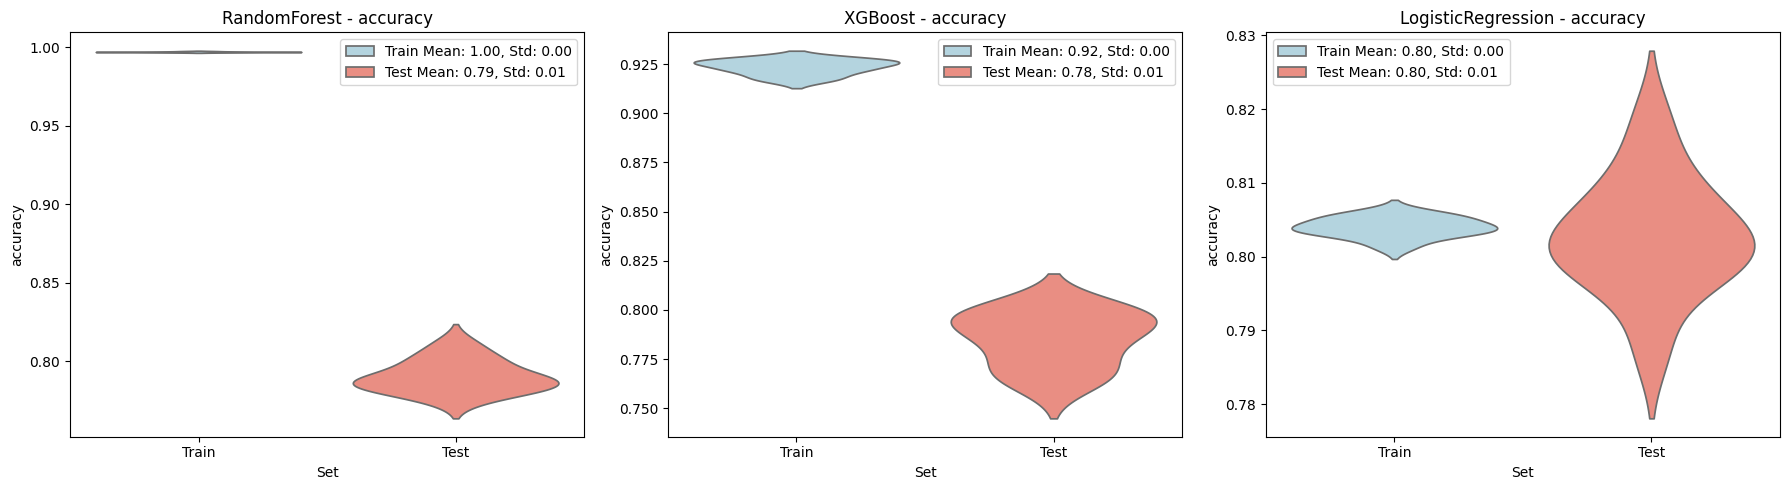

In [7]:
# Visualize results - Accuracy (Bad metric for imbalanced problems)

evaluation_pipeline.results_viz(['accuracy'])

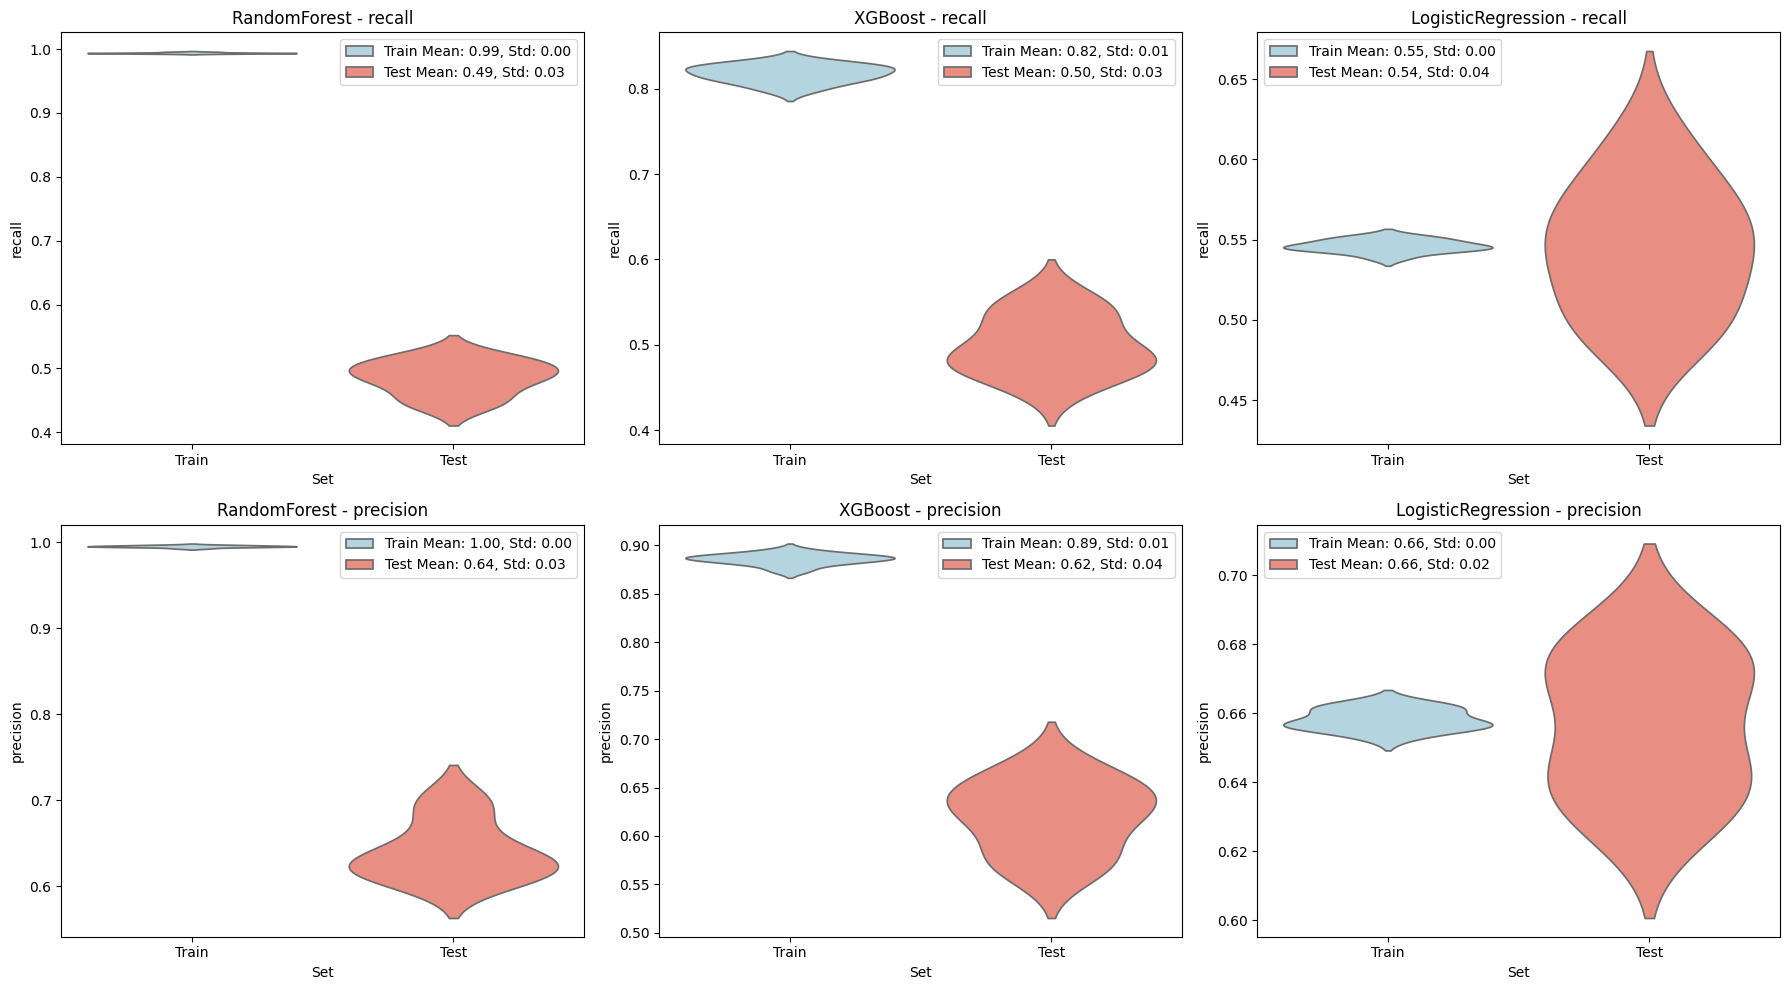

In [8]:
# Visualize results - Recall and Precision

evaluation_pipeline.results_viz(['recall', 'precision'])

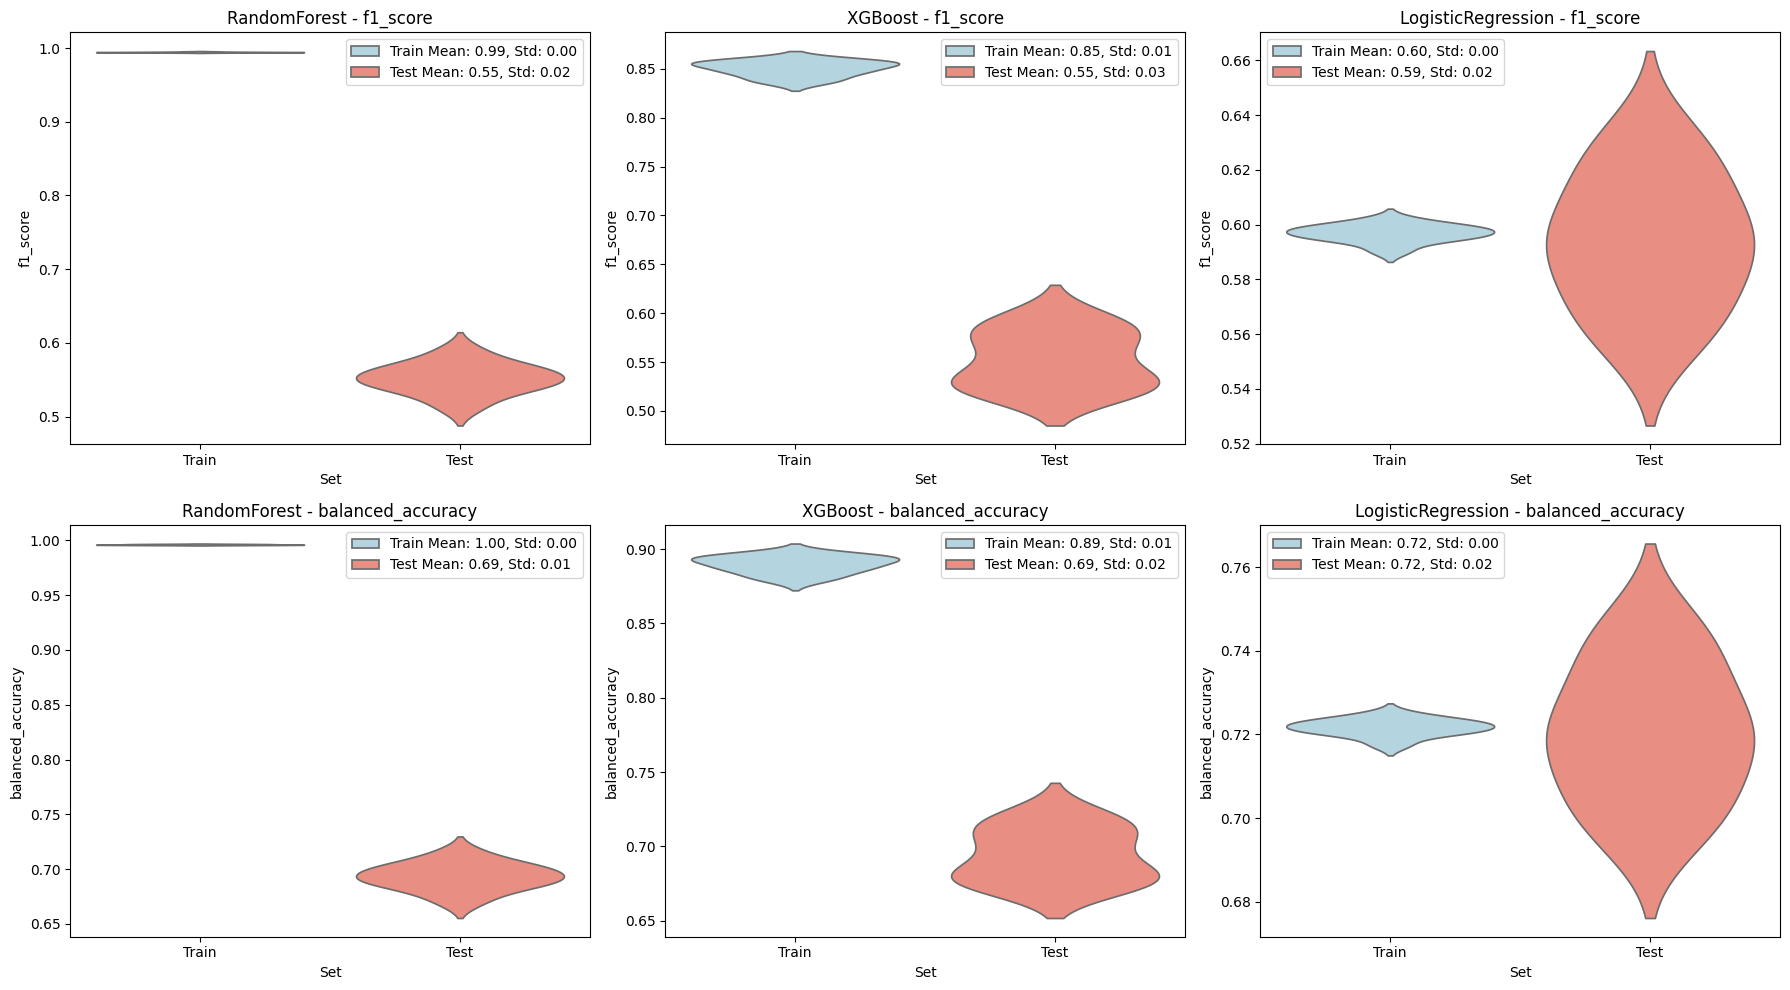

In [11]:
# Visualize results - f1 score and balanced accuracy

evaluation_pipeline.results_viz(['f1_score', 'balanced_accuracy'])

## Evalutate Models with handling imbalanced label

In [9]:
# SMOTE to handle label imbalanced

print("Evaluating with SMOTE:")
evaluation_pipeline.stratified_k_cv(k=5, imbalance_method='SMOTE')

Evaluating with SMOTE:
Fold 1:
Training Model 1 RandomForest...
Training Model 2 XGBoost...
Training Model 3 LogisticRegression...
Fold 2:
Training Model 1 RandomForest...
Training Model 2 XGBoost...
Training Model 3 LogisticRegression...
Fold 3:
Training Model 1 RandomForest...
Training Model 2 XGBoost...
Training Model 3 LogisticRegression...
Fold 4:
Training Model 1 RandomForest...
Training Model 2 XGBoost...
Training Model 3 LogisticRegression...
Fold 5:
Training Model 1 RandomForest...
Training Model 2 XGBoost...
Training Model 3 LogisticRegression...


In [ ]:
# Visualize results

evaluation_pipeline.results_viz(['accuracy'])